In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel('/content/Bookings data.xlsx' )
df

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.00,119.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.00,162.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.00,250.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",77.40,"Team Dimpal (2P, I): 77.40",NaN,NaN,29/06/2018 1:19pm,NaN,NaN,"1 Bedroom, 1

In [5]:
df.shape

(5609, 38)

In [6]:
df.columns

Index(['Date', 'Time', 'First Name', 'Last Name', 'Full Name', 'Company Name',
       'City', 'State', 'Postal Code', 'Location', 'Rating Value',
       'Rating Comment', 'Service Total', 'Extras Total', 'Final Amount',
       'Amount Paid by the Customer', 'Amount Owed by Customer', 'Tip',
       'Payment Method', 'Frequency', 'Discount Code', 'Discount from Code',
       'Discount from Frequency', 'Discount from Referral',
       'Giftcard Amount Used', 'Teams Assigned',
       'Teams Assigned  (without IDs)', 'Team Earnings (Amount)',
       'Team Earnings (Summary)', 'Team has Key', 'Team requested',
       'Date Created', 'Created By', 'Next Booking Date', 'Services',
       'Staff Notes', 'Customer Notes', 'Booking ID'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5609 non-null   datetime64[ns]
 1   Time                           5609 non-null   object        
 2   First Name                     5609 non-null   object        
 3   Last Name                      5609 non-null   object        
 4   Full Name                      5609 non-null   object        
 5   Company Name                   0 non-null      float64       
 6   City                           5609 non-null   object        
 7   State                          5609 non-null   object        
 8   Postal Code                    5609 non-null   int64         
 9   Location                       5609 non-null   object        
 10  Rating Value                   1470 non-null   float64       
 11  Rating Comment   

In [8]:
df['Time'].unique()

array(['9:00am', '9:30am', '3:00pm', '11:30am', '11:00am', '10:00am',
       '5:00pm', '8:00am', '4:00am', '12:00pm', '1:00pm', '2:00pm',
       '4:00pm', '8:30am', '2:30pm', '6:00pm', '3:30pm', '5:30pm',
       '7:30am', '6:00am', '7:00pm', '9:45am', '3:15pm', '10:30am',
       '8:50am', '7:15pm', '12:30pm', '1:20pm', '1:30pm', '7:00am',
       '8:15am', '4:30pm', '9:15am', '7:45am', '12:15pm'], dtype=object)

In [9]:
df['Full Name'].unique()

array(['Rebecca Jenkins', 'Lauren Goss', 'David Shellien', ...,
       'yvonne chong', 'Allan Springall', 'Jordan Miralis'], dtype=object)

In [10]:
df['Full Name'].nunique()

1701

In [11]:
name =df['Full Name'].unique()
name

array(['Rebecca Jenkins', 'Lauren Goss', 'David Shellien', ...,
       'yvonne chong', 'Allan Springall', 'Jordan Miralis'], dtype=object)

In [12]:
df1 = df.drop_duplicates(subset = ["Full Name"])
df1


,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.6,113.6,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.4,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.0,119.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.0,162.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.0,250.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6
7,2015-08-28,9:00am,Peter,Schafer,Peter Schafer,NaN,Penrith,NSW,2750,Location_2,NaN,NaN,185.0,0,600.0,600.0,0.0,0,check,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),360.00,Team Kawhara (G): 360.00,NaN,NaN,21/08/2015 1:51pm,NaN,NaN,"3 Bedrooms, 2 x Bathroom",Customer will be on site during clean\n\nFull ...,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,2018-06-30,11:00am,Leigh,Simpkin,Leigh Simpkin,NaN,Location_2,NSW,2090,Location_2,2.0,Great. It needed to be for the price and it wa...,129.0,60,170.1,170.1,0.0,0,stripe,Monthly - 10% off,NaN,0.0,18.9,0,0,"43: Team Eric (5T, G)","Team Eric (5T, G)",110.57,"Team Eric (5T, G): 110.57",NaN,NaN,26/06/2018 8:33am,NaN,04/08/2018 11:00am,"1 Bedroom, 1 x Bathroom, 2 x wet wipe blinds $30",30/06 2 x wet wipe blinds,My vacuum is broken and so the carpets are fil...,7472
5599,2018-06-30,11:00am,Jeramee,Rice,Jeramee Rice,NaN,Milsons Point,NSW,2061,Location_2,NaN,NaN,169.0,0,169.0,169.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,1639: Team Aniei,Team Aniei,109.85,Team Aniei: 109.85,NaN,NaN,27/06/2018 10:44am,NaN,NaN,"2 Bedrooms, 2 x Bathroom",NaN,We are looking for a regular cleaning service....,7494
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.0,356.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.0,328.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bath

In [13]:
df1['Date'].nunique()

575

In [14]:
df['Calculated Column'] = df1['Date']
df

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,Calculated Column
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015-08-05
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.00,119.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5,2015-08-08
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4,NaT
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.00,162.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8,2015-08-14
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.00,250.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6,2015-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523,2018-06-30
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541,2018-06-30
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067,NaT
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Di

In [15]:
new = df.groupby('Full Name').Full Name.count()>4
new
#.mi.count() > 2


SyntaxError: ignored

In [16]:
area =df['Full Name'].value_counts()
area.head

<bound method NDFrame.head of Tom Gilpin            87
David Milton          71
Greg Buxton           68
Monica Armesto        61
Lucinda Crow          59
                      ..
Liza Baghdassarian     1
Nil Pozcu              1
Susanna McLoughlin     1
Kawhara Alghazawi      1
Gurneet Kaur           1
Name: Full Name, Length: 1701, dtype: int64>

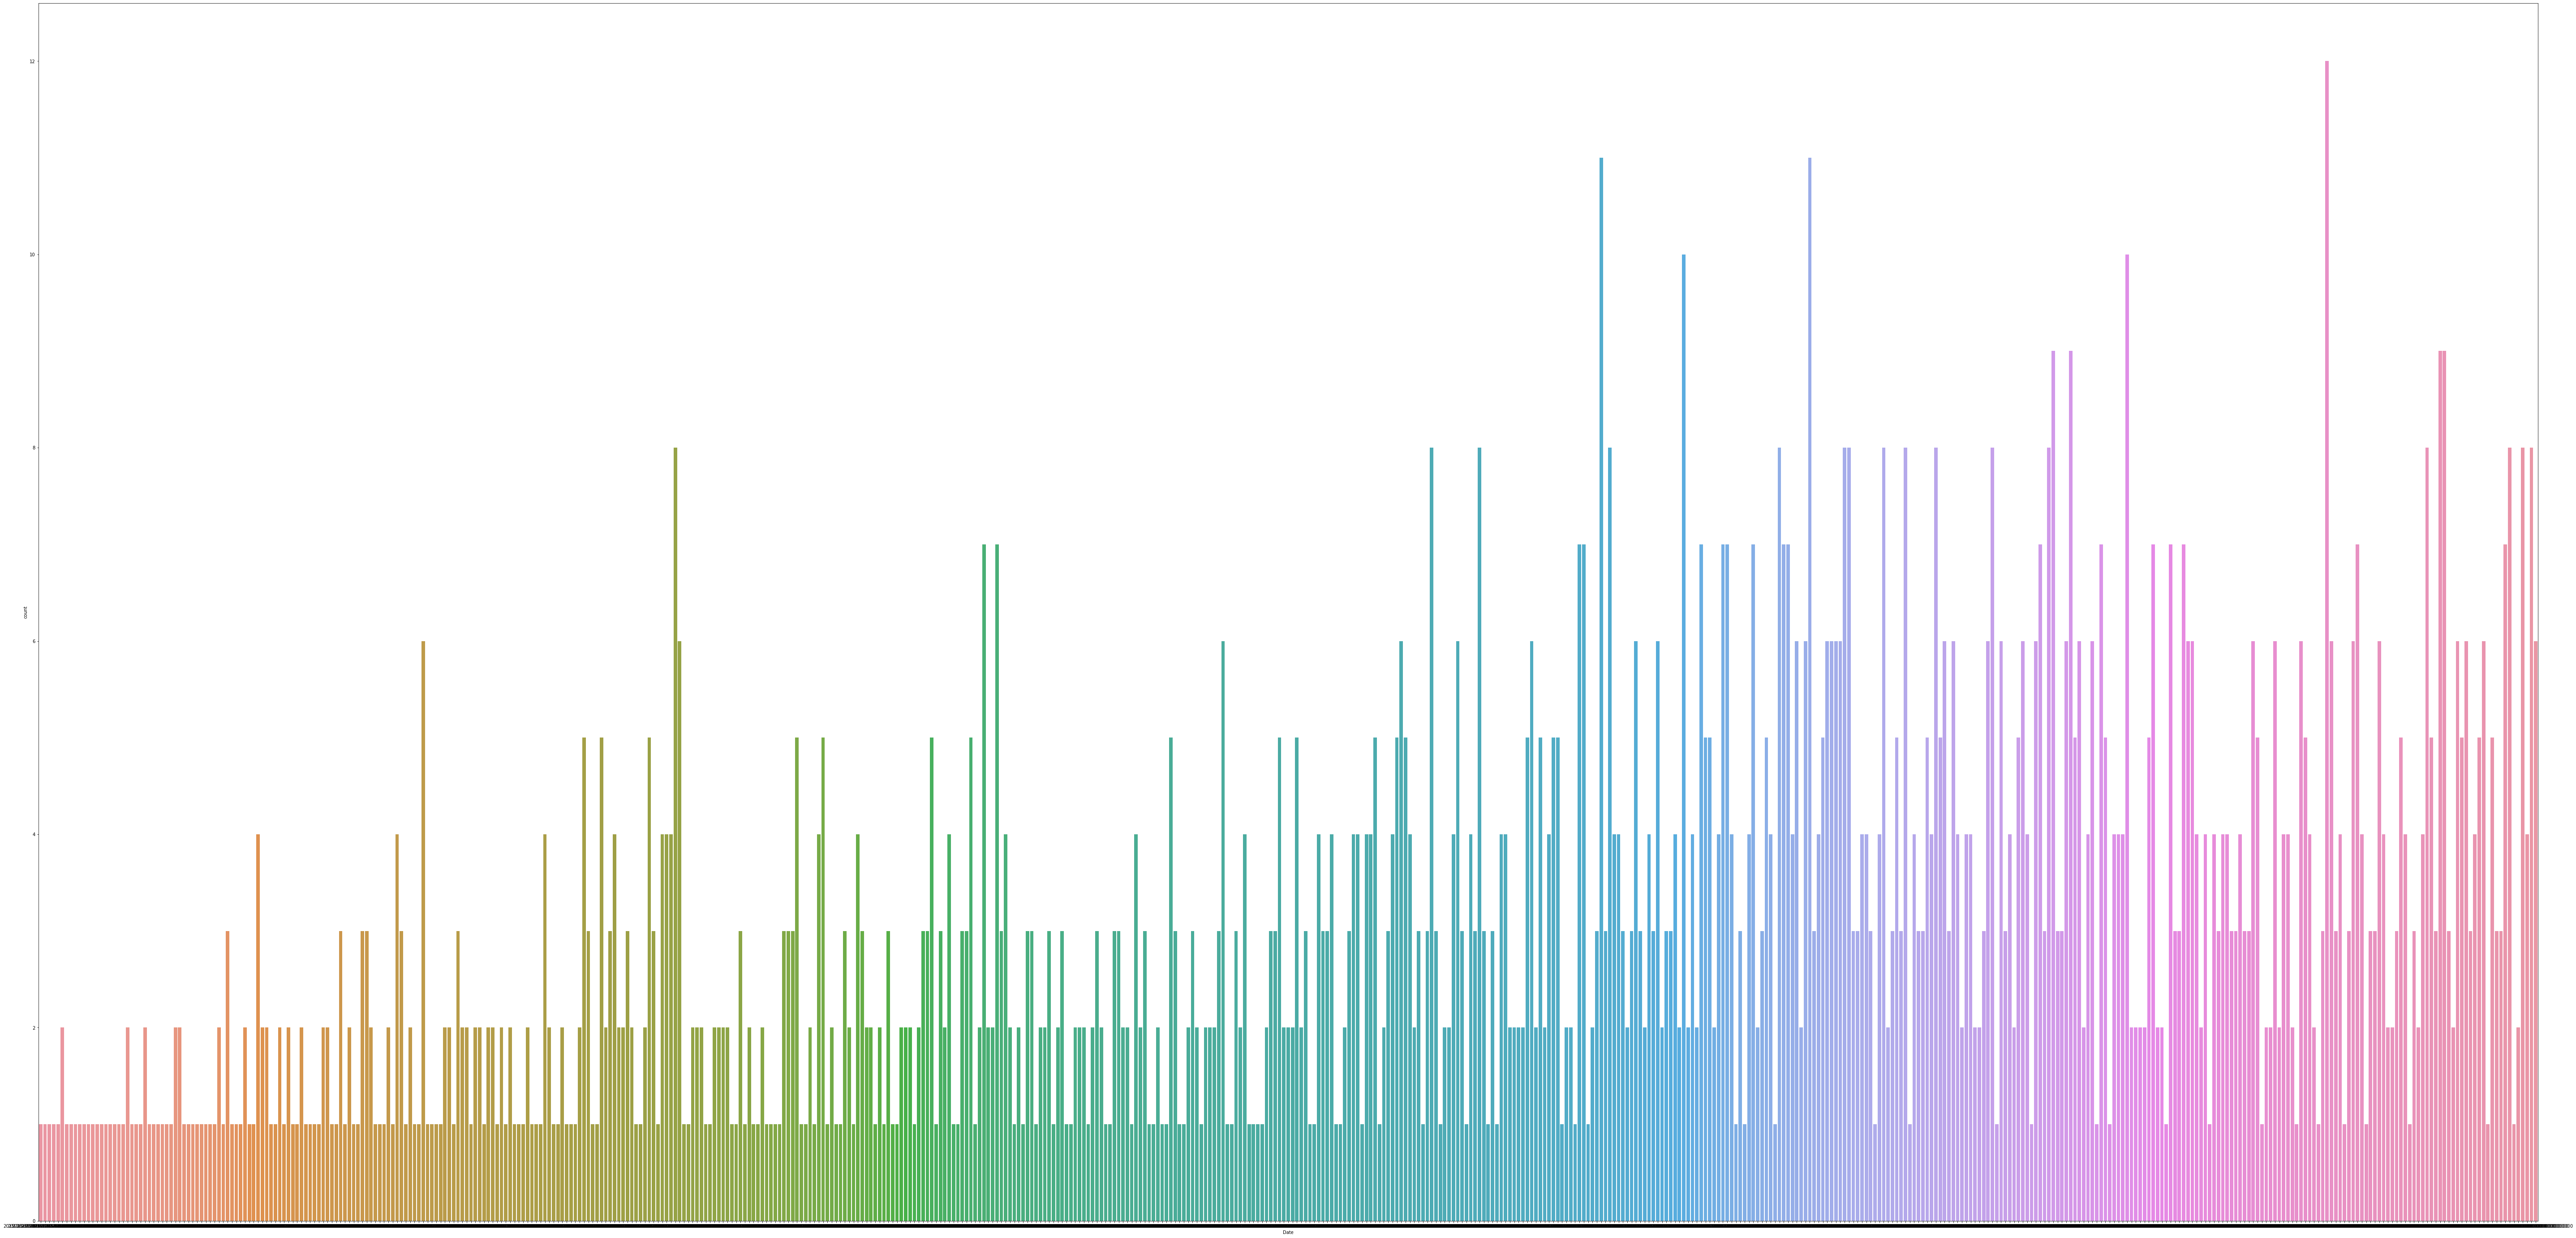

In [17]:
plt.figure(figsize=(100,50))
sns.countplot(x = 'Date'  , data = df1, orient = 90)

In [18]:
df['Frequency'].unique()

array(['Every week - 20% off', '1 time service',
       'Every 4 weeks - 10% off', 'Every 2 weeks - 15% off',
       'Weekly - 15% off', 'Fortnightly - 15% off', 'Monthly - 5% off',
       'Weekly - 20% off', 'Monthly - 10% off'], dtype=object)

In [24]:
df3 = df[df['Frequency']!='1 time service']
df3

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,Calculated Column
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015-08-05
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4,NaT
5,2015-08-19,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,13/08/2015 12:19am,NaN,26/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,7,NaT
6,2015-08-26,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,20/08/2015 12:21am,NaN,09/09/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,10,NaT
8,2015-09-09,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,02/09/2015 1:59pm,NaN,19/09/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,14,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,2018-06-30,12:00pm,Sheree,Stiff,Sheree Stiff,NaN,Greenwich,NSW,2065,Location_2,NaN,NaN,189.0,0,151.20,151.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,37.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",98.28,"Team Jackson (4T, G): 98.28",NaN,NaN,24/06/2018 12:16am,NaN,07/07/2018 12:00pm,"3 Bedrooms, 2 x Bathroom",NaN,Hi\nI have noted we will leave a key under the...,7443,NaT
5602,2018-06-30,1:00pm,Alison,Northcote,Alison Northcote,NaN,Neutral Bay,NSW,2089,Location_2,NaN,NaN,135.0,0,114.75,114.75,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,20.25,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",74.59,"Team Jackson (4T, G): 74.59",NaN,NaN,15/06/2018 12:19am,NaN,13/07/2018 1:00pm,Hourly Service (2 Cleaners x 1.50 Hours),IMPORTANT ** 30/06 Jackson please ask your tea...,NaN,7256,NaT
5603,2018-06-30,1:00pm,Sacha,Gregory,Sacha Gregory,NaN,Location_2,NSW,2037,Location_2,NaN,NaN,180.0,0,153.00,153.00,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,27.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",116.28,"Team Jackson (4T, G): 116.28",NaN,NaN,17/06/2018 12:22am,NaN,14/07/2018 1:00pm,Hourly Service (2 Cleaners x 2.00 Hours),***Please work down the list pending on time**...,The key has been left in the electricity box b...,7299,NaT
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont

In [ ]:
#df[df['Frequency']=='1 time service']

In [20]:
df3.sum()

Time                           9:00am9:00am9:00am9:00am9:00am9:00am9:00am9:00...
First Name                     RebeccaRebeccaRebeccaRebeccaRebeccaRebeccaRebe...
Last Name                      JenkinsJenkinsJenkinsJenkinsJenkinsJenkinsJenk...
Full Name                      Rebecca JenkinsRebecca JenkinsRebecca JenkinsR...
Company Name                                                                   0
City                           Crows NestCrows NestCrows NestCrows NestCrows ...
State                          NSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWNSWN...
Postal Code                                                              8606971
Location                       Location_2Location_2Location_2Location_2Locati...
Rating Value                                                                1631
Service Total                                                             708127
Extras Total                                                               45217
Final Amount                

In [26]:
start_date = '2018-04-01'
end_date = '2018-07-01'

In [29]:
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df4 = df.loc[mask]
df4

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
4247,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/2018 10:44am,NaN,09/04/2018 7:00am,"6 Bedrooms, 3 x Bathroom",NaN,"There is an apartment block next door 107, ple...",5698
4248,2018-04-02,7:00am,Adelle,Drover,Adelle Drover,NaN,Potts Point,NSW,2011,Location_2,NaN,NaN,149.0,10,127.20,127.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,31.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",89.04,"Team Jackson (4T, G): 89.04",NaN,NaN,27/03/2018 12:21am,NaN,09/04/2018 9:00am,"2 Bedrooms, 1 x Bathroom, 1 x change bed sheet...",**IMPORTANT** Hi Jen can you please send the s...,This is a multi story terrace house. The upper...,5722
4249,2018-04-02,9:00am,Sally,Lord,Sally Lord,NaN,bellevue hill,NSW,2023,Location_2,2.0,NaN,249.0,0,211.65,211.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,37.35,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",137.57,"Team Jackson (4T, G): 137.57",NaN,NaN,20/03/2018 12:17am,NaN,16/04/2018 9:00am,"4 Bedrooms, 3 x Bathroom",NaN,We have a cat,5586
4250,2018-04-02,9:00am,Helen,Burns,Helen Burns,NaN,Fairlight,NSW,2094,Location_2,NaN,NaN,90.0,0,72.00,72.00,0.0,0,stripe,Weekly - 20% off,NaN,0.0,18.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",59.04,"Team Jackson (4T, G): 59.04",NaN,NaN,20/03/2018 9:48am,NaN,16/04/2018 9:00am,Hourly Service (2 Cleaners x 1.00 Hour),**Hourly booking with 2 cleaners**,NaN,5592
4251,2018-04-02,10:30am,Lee,Moffatt,Lee Moffatt,NaN,Sandringham,VIC,3191,Location_3,NaN,NaN,209.0,0,177.65,177.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,31.35,0,0,1582: Team Dixit (G),Team Dixit (G),106.59,Team Dixit (G): 106.59,NaN,NaN,19/03/2018 9:46am,NaN,16/04/2018 10:30am,"3 Bedrooms, 3 x Bathroom",NaN,The house is two level. With three bedrooms a...,5572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,

In [31]:
df4['Full Name'].nunique()

533

In [32]:
df5 = df4.drop_duplicates(subset = ["Full Name"])
df5

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
4247,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/2018 10:44am,NaN,09/04/2018 7:00am,"6 Bedrooms, 3 x Bathroom",NaN,"There is an apartment block next door 107, ple...",5698
4248,2018-04-02,7:00am,Adelle,Drover,Adelle Drover,NaN,Potts Point,NSW,2011,Location_2,NaN,NaN,149.0,10,127.20,127.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,31.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",89.04,"Team Jackson (4T, G): 89.04",NaN,NaN,27/03/2018 12:21am,NaN,09/04/2018 9:00am,"2 Bedrooms, 1 x Bathroom, 1 x change bed sheet...",**IMPORTANT** Hi Jen can you please send the s...,This is a multi story terrace house. The upper...,5722
4249,2018-04-02,9:00am,Sally,Lord,Sally Lord,NaN,bellevue hill,NSW,2023,Location_2,2.0,NaN,249.0,0,211.65,211.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,37.35,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",137.57,"Team Jackson (4T, G): 137.57",NaN,NaN,20/03/2018 12:17am,NaN,16/04/2018 9:00am,"4 Bedrooms, 3 x Bathroom",NaN,We have a cat,5586
4250,2018-04-02,9:00am,Helen,Burns,Helen Burns,NaN,Fairlight,NSW,2094,Location_2,NaN,NaN,90.0,0,72.00,72.00,0.0,0,stripe,Weekly - 20% off,NaN,0.0,18.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",59.04,"Team Jackson (4T, G): 59.04",NaN,NaN,20/03/2018 9:48am,NaN,16/04/2018 9:00am,Hourly Service (2 Cleaners x 1.00 Hour),**Hourly booking with 2 cleaners**,NaN,5592
4251,2018-04-02,10:30am,Lee,Moffatt,Lee Moffatt,NaN,Sandringham,VIC,3191,Location_3,NaN,NaN,209.0,0,177.65,177.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,31.35,0,0,1582: Team Dixit (G),Team Dixit (G),106.59,Team Dixit (G): 106.59,NaN,NaN,19/03/2018 9:46am,NaN,16/04/2018 10:30am,"3 Bedrooms, 3 x Bathroom",NaN,The house is two level. With three bedrooms a...,5572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,2018-06-30,11:00am,Leigh,Simpkin,Leigh Simpkin,NaN,Location_2,NSW,2090,Location_2,2.0,Great. It needed to be for the price and it wa...,129.0,60,170.10,170.10,0.0,0,stripe,Monthly - 10% off,NaN,0.0,18.90,0,0,"43: Team Eric (5T, G)","Team Eric (5T, G)",110.57,"Team Eric (5T, G): 110.57",NaN,NaN,26/06/2018 8:33am,NaN,04/08/2018 11:00am,"1 Bedroom, 1 x Bathroom, 2 x wet wipe blinds $30",30/06 2 x wet wipe blinds,My vacuum is broken and so the carpets are fil...,7472
5599,2018-06-30,11:00am,Jeramee,Rice,Jeramee Rice,NaN,Milsons Point,NSW,2061,Location_2,NaN,NaN,169.0,0,169.00,169.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,1639: Team Aniei,Team Aniei,109.85,Team Aniei: 109.85,NaN,NaN,27/06/2018 10:44am,NaN,NaN,"2 Bedrooms, 2 x Bathroom",NaN,We are looking for a regular cleaning service....,7494
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time s

In [62]:
new_start_date = '2018-05-15'
new_end_date = '2018-07-01'

mask = (df['Date'] > new_start_date) & (df['Date'] <= new_end_date)
df6 = df.loc[mask]
df6

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
4871,2018-05-16,7:00am,Siobhan,Naylor,Siobhan Naylor,NaN,Vaucluse,NSW,2030,Location_2,NaN,NaN,149.0,0,149.00,149.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",96.85,"Team Jackson (4T, G): 96.85",NaN,NaN,14/05/2018 1:44pm,NaN,05/06/2018 7:00am,"2 Bedrooms, 1 x Bathroom",NaN,For parking: My driveway is the third from the...,6615
4872,2018-05-16,9:00am,Maija,Morris,Maija Morris,NaN,Waterloo,NSW,2017,Location_2,NaN,NaN,129.0,467,1376.00,1376.00,0.0,0,stripe,1 time service,GET20,20.0,0.00,0,0,"43: Team Eric (5T, G)","Team Eric (5T, G)",963.20,"Team Eric (5T, G): 963.20",NaN,NaN,07/04/2018 6:00pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, move in/move out $150...","**16/04 oven, balcony, spot clean walls, carpe...","16/05; Hi team, rather than leaving the key wi...",5916
4873,2018-05-16,9:00am,Erin,Crockford,Erin Crockford,NaN,Russell Lea,NSW,2046,Location_2,NaN,NaN,129.0,0,109.65,109.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,19.35,0,0,"43: Team Eric (5T, G)","Team Eric (5T, G)",65.79,"Team Eric (5T, G): 65.79",NaN,NaN,02/05/2018 12:24am,NaN,14/06/2018 9:00am,"1 Bedroom, 1 x Bathroom",NaN,Unit 2 in old cream coloured building. Enter v...,6381
4874,2018-05-16,9:00am,Stacy,Hotop,Stacy Hotop,NaN,Randwick,NSW,2031,Location_2,NaN,NaN,149.0,0,126.65,126.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,22.35,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",82.32,"Team Jackson (4T, G): 82.32",NaN,NaN,03/05/2018 12:19am,NaN,NaN,"2 Bedrooms, 1 x Bathroom",NaN,NaN,6398
4875,2018-05-16,10:00am,Chanel,Stewart,Chanel Stewart,NaN,Bondi Junction,NSW,2022,Location_2,NaN,NaN,129.0,29,158.00,158.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,1639: Team Aniei,Team Aniei,126.40,Team Aniei: 126.40,NaN,NaN,15/05/2018 10:46am,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x balcony $29",16/05 balcony clean please,Mostly clean home. \nThere is a guest parking ...,6630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimp

In [61]:
data = df.merge(df6,on=['Full Name'],how='left')
data

,Date_x,Time_x,First Name_x,Last Name_x,Full Name,Company Name_x,City_x,State_x,Postal Code_x,Location_x,Rating Value_x,Rating Comment_x,Service Total_x,Extras Total_x,Final Amount_x,Amount Paid by the Customer_x,Amount Owed by Customer_x,Tip_x,Payment Method_x,Frequency_x,Discount Code_x,Discount from Code_x,Discount from Frequency_x,Discount from Referral_x,Giftcard Amount Used_x,Teams Assigned_x,Teams Assigned (without IDs)_x,Team Earnings (Amount)_x,Team Earnings (Summary)_x,Team has Key_x,Team requested_x,Date Created_x,Created By_x,Next Booking Date_x,Services_x,Staff Notes_x,Customer Notes_x,Booking ID_x,Date_y,Time_y,First Name_y,Last Name_y,Company Name_y,City_y,State_y,Postal Code_y,Location_y,Rating Value_y,Rating Comment_y,Service Total_y,Extras Total_y,Final Amount_y,Amount Paid by the Customer_y,Amount Owed by Customer_y,Tip_y,Payment Method_y,Frequency_y,Discount Code_y,Discount from Code_y,Discount from Frequency_y,Discount from Referral_y,Giftcard Amount Used_y,Teams Assigned_y,Teams Assigned (without IDs)_y,Team Earnings (Amount)_y,Team Earnings (Summary)_y,Team has Key_y,Team requested_y,Date Created_y,Created By_y,Next Booking Date_y,Services_y,Staff Notes_y,Customer Notes_y,Booking ID_y
0,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/2018 10:44am,NaN,09/04/2018 7:00am,"6 Bedrooms, 3 x Bathroom",NaN,"There is an apartment block next door 107, ple...",5698,2018-05-22,11:00am,Isobel,Carroll,NaN,North Location_2,NSW,2060.0,Location_2,NaN,NaN,299.0,0.0,239.20,239.20,0.0,0.0,stripe,Weekly - 20% off,NaN,0.0,59.80,0.0,0.0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,15/05/2018 12:23am,NaN,29/05/2018 11:00am,"6 Bedrooms, 3 x Bathroom",PLEASE DON'T RESCHEDULE ANYMORE\n\n22/05 custo...,"There is an apartment block next door 107, ple...",6621.0
1,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/2018 10:44am,NaN,09/04/2018 7:00am,"6 Bedrooms, 3 x Bathroom",NaN,"There is an apartment block next door 107, ple...",5698,2018-05-29,11:00am,Isobel,Carroll,NaN,North Location_2,NSW,2060.0,Location_2,NaN,NaN,299.0,0.0,239.20,239.20,0.0,0.0,stripe,Weekly - 20% off,NaN,0.0,59.80,0.0,0.0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,23/05/2018 12:16am,NaN,05/06/2018 11:00am,"6 Bedrooms, 3 x Bathroom",PLEASE DON'T RESCHEDULE ANYMORE\n\n22/05 custo...,"There is an apartment block next door 107, ple...",6770.0
2,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/2018 10:44am,NaN,09/04/2018 7:00am,"6 Bedrooms, 3 x Bathroom",NaN,"There is an apartment block next door 107, ple...",5698,2018-06-05,11:00am,Isobel,Carroll,NaN,North Location_2,NSW,2060.0,Location_2,NaN,NaN,299.0,0.0,239.20,239.20,0.0,0.0,stripe,Weekly - 20% off,NaN,0.0,59.80,0.0,0.0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,30/05/2018 12:20am,NaN,18/06/2018 8:00am,"6 Bedrooms, 3 x Bathroom",PLEASE DON'T RESCHEDULE ANYMORE\n\n22/05 custo...,"There is an apartment block next door 107, ple...",6902.0
3,2018-04-02,7:00am,Isobel,Carroll,Isobel Carroll,NaN,North Location_2,NSW,2060,Location_2,NaN,NaN,299.0,0,239.20,239.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,59.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",155.48,"Team Jackson (4T, G): 155.48",NaN,NaN,25/03/201

In [64]:
import datetime
df

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.00,119.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.00,162.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.00,250.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",77.40,"Team Dimpal (2P, I): 77.40",NaN,NaN,29/06/2018 1:19pm,NaN,NaN,"1 Bedroom, 1

In [101]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,year
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.6,113.6,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.4,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.0,119.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5,2015
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.6,113.6,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.4,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4,2015
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.0,162.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8,2015
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.0,250.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6,2015


In [72]:
xyz = df.groupby('year')['Amount Paid by the Customer'].sum()
xyz

#.sort_values('count',ascending = False)


year
2015      4163.20
2016    111271.68
2017    431737.12
2018    460272.61
Name: Amount Paid by the Customer, dtype: float64

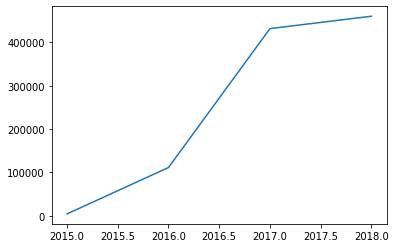

In [75]:
plt.plot(xyz)

In [76]:
df8 = df.drop_duplicates(subset = ["Full Name"])
df8

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,year
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.6,113.6,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.4,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.0,119.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5,2015
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.0,162.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8,2015
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.0,250.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6,2015
7,2015-08-28,9:00am,Peter,Schafer,Peter Schafer,NaN,Penrith,NSW,2750,Location_2,NaN,NaN,185.0,0,600.0,600.0,0.0,0,check,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),360.00,Team Kawhara (G): 360.00,NaN,NaN,21/08/2015 1:51pm,NaN,NaN,"3 Bedrooms, 2 x Bathroom",Customer will be on site during clean\n\nFull ...,NaN,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,2018-06-30,11:00am,Leigh,Simpkin,Leigh Simpkin,NaN,Location_2,NSW,2090,Location_2,2.0,Great. It needed to be for the price and it wa...,129.0,60,170.1,170.1,0.0,0,stripe,Monthly - 10% off,NaN,0.0,18.9,0,0,"43: Team Eric (5T, G)","Team Eric (5T, G)",110.57,"Team Eric (5T, G): 110.57",NaN,NaN,26/06/2018 8:33am,NaN,04/08/2018 11:00am,"1 Bedroom, 1 x Bathroom, 2 x wet wipe blinds $30",30/06 2 x wet wipe blinds,My vacuum is broken and so the carpets are fil...,7472,2018
5599,2018-06-30,11:00am,Jeramee,Rice,Jeramee Rice,NaN,Milsons Point,NSW,2061,Location_2,NaN,NaN,169.0,0,169.0,169.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,1639: Team Aniei,Team Aniei,109.85,Team Aniei: 109.85,NaN,NaN,27/06/2018 10:44am,NaN,NaN,"2 Bedrooms, 2 x Bathroom",NaN,We are looking for a regular cleaning service....,7494,2018
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.0,356.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523,2018
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.0,328.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedr

In [97]:
pqr = df8.groupby('year')['Full Name'].size()
pqr

year
2015     11
2016    246
2017    809
2018    635
Name: Full Name, dtype: int64

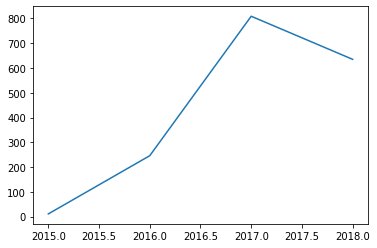

In [96]:
plt.plot(pqr)

In [99]:
abc=xyz/pqr
abc

year
2015    378.472727
2016    452.323902
2017    533.667639
2018    724.838756
dtype: float64

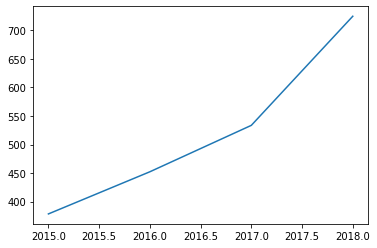

In [100]:
plt.plot(abc)


In [81]:
df8.groupby('year')